### **Objective of the Dataset: Predict Customer Purchase Behavior**  

The main goal of this dataset is to **predict whether a customer will make a purchase** based on various factors such as:  
✅ **Demographic Information** (Age, Gender, etc.)  
✅ **Financial Data** (Income, Credit Score, etc.)  
✅ **Behavioral Data** (Browsing History, Past Purchases, etc.)  

### **Real-World Applications:**  
📌 **E-commerce & Retail:** Recommend products to potential buyers.  
📌 **Marketing & Advertising:** Target the right audience for promotions.  
📌 **Banking & Finance:** Assess creditworthiness based on spending ocessing? 😊

In [4]:
# stpe 1
import pandas as pd  

# Load the dataset (replace 'your_file.csv' with the actual filename)
df = pd.read_csv("customer_purchase_data.csv")  

# Display the first few rows
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


#### Step 2: Data Exploration
📌 Run these to check for missing values and data types:

In [7]:
# Check dataset info
df.info()

# Check missing values
df.isnull().sum()

# Check basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


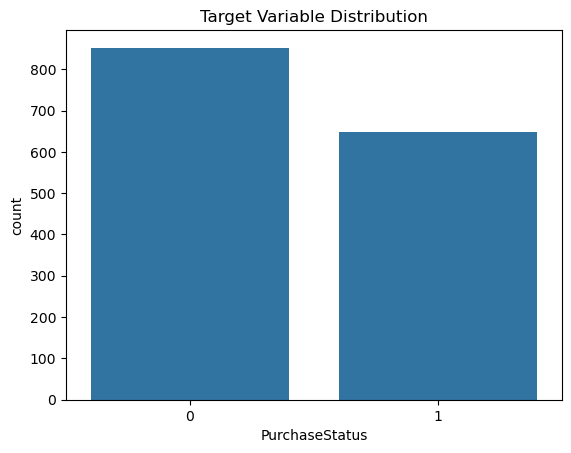

PurchaseStatus
0    0.568
1    0.432
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x=df["PurchaseStatus"])
plt.title("Target Variable Distribution")
plt.show()

# Print exact class distribution
print(df["PurchaseStatus"].value_counts(normalize=True))


In [11]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Features to scale
scaler = MinMaxScaler()
df[["AnnualIncome", "TimeSpentOnWebsite"]] = scaler.fit_transform(df[["AnnualIncome", "TimeSpentOnWebsite"]])

# Display updated dataset
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,0.355351,8,0,0.500925,0,5,1
1,20,1,0.027571,4,2,0.631052,0,5,0
2,27,1,0.830766,11,2,0.518983,1,0,1
3,24,1,0.907642,19,3,0.765512,0,4,1
4,31,1,0.611013,19,1,0.318664,0,0,1


Split Data into Train & Test Sets

In [14]:
from sklearn.model_selection import train_test_split

# Define Features & Target
X = df.drop(columns=["PurchaseStatus"])  # Independent variables
y = df["PurchaseStatus"]  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)


Training Data: (1200, 8) (1200,)
Testing Data: (300, 8) (300,)


Train a Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8600

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       170
           1       0.85      0.82      0.84       130

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Improve the Model (Hyperparameter Tuning)

In [20]:
# Train with hyperparameters
dt_model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_tuned.fit(X_train, y_train)

# Predictions
y_pred_tuned = dt_model_tuned.predict(X_test)

# Evaluate
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.8533

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       170
           1       0.82      0.85      0.83       130

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



 Feature Importance Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23368\432198201.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


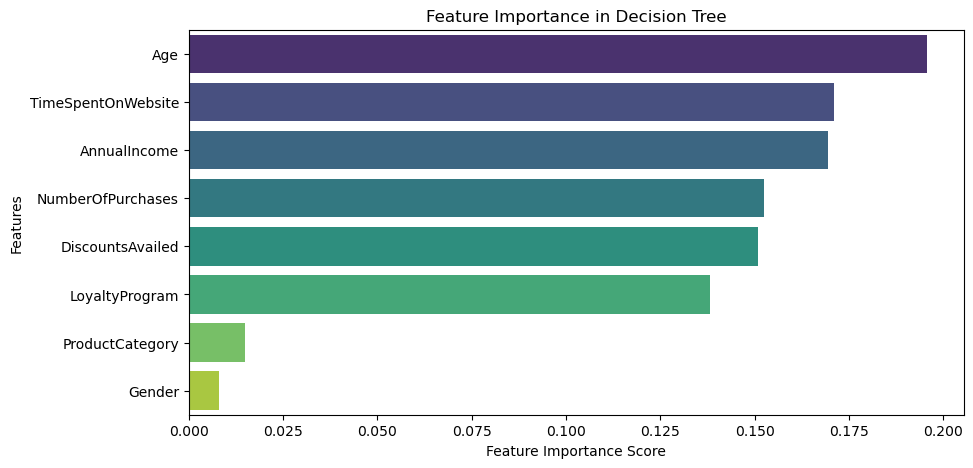

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = dt_model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.show()


Visualizing the Decision Tree

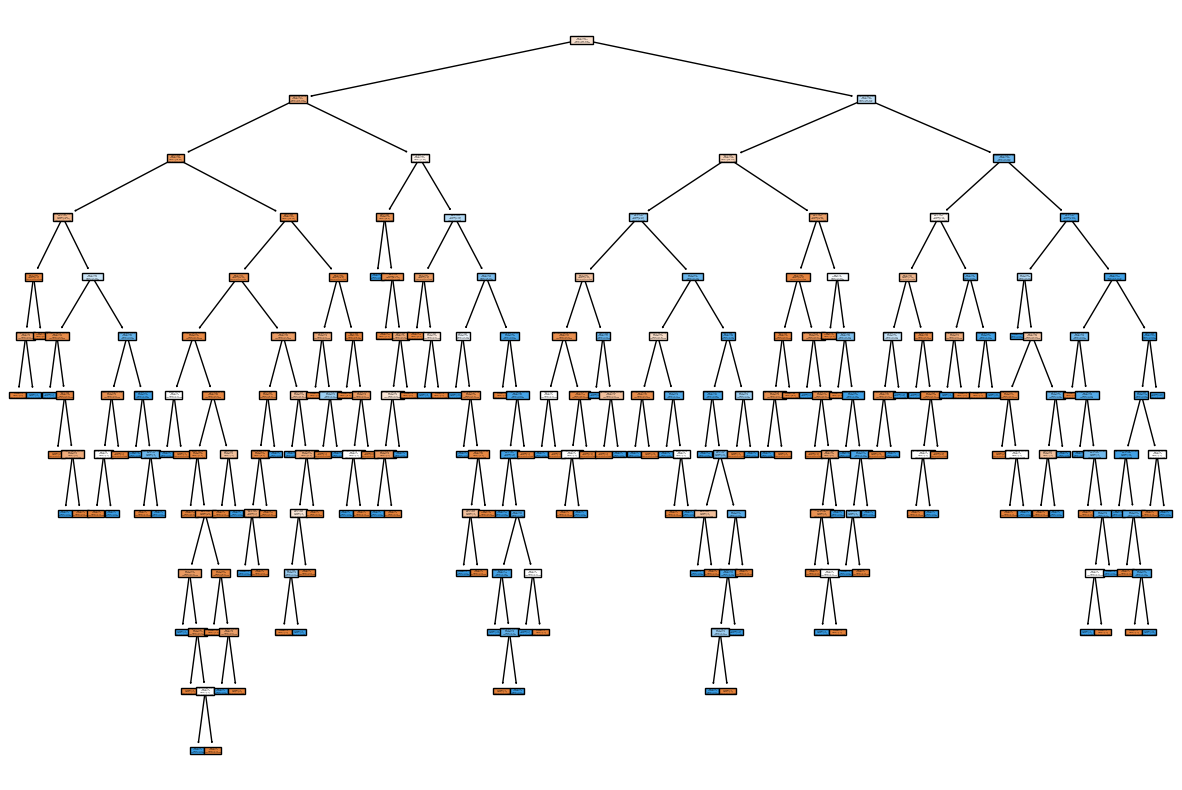

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()
